In [28]:
library(MASS)
library(pROC)
library(ggplot2)
library(caret)
options(warn=-1)
options(scipen = 999)

The dataset is from the UC Irvine Machine Learning Repository<br>
Link to the dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing<br>
Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

The data is from a direct marketing campaign of a Portuguese banking institution. The goal is to predict if the client will subscribe a term deposit.<br>
Often more than one contact to the same client was required.

In [2]:
df = read.csv('bank-full.csv',sep = ';')

In [3]:
head(df,10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
9,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no


In [4]:
sum(is.na(df))

[1] 0

- default: whether the customer has credit in default.
- balance: average yearly balance.
- houssing: whether they have housing loan or not.
- loan: whether they have personal loan or not.
- contact: contact communication type (cellular / telephone).
- day_of_week: last contact day of the week.
- month: last contact month of the year.
- duration: last contact duration.
- campaign: number of contacts performed during this campaign.
- pdays: number of days that passed by after the client was last contacted from a pervious campaign.
- previous: number of contacts performed before this campaign for this client.
- poutcome: outcome of previous marketing campaign.
- y: whether the client subscribed to a term deposit or not.

In [5]:
table(df$job)


       admin.   blue-collar  entrepreneur     housemaid    management 
         5171          9732          1487          1240          9458 
      retired self-employed      services       student    technician 
         2264          1579          4154           938          7597 
   unemployed       unknown 
         1303           288 

In [6]:
fact_names = c('job','marital','education','contact','month','poutcome','y')
for (i in fact_names)
    {
    df[,i] = as.factor(df[,i])
}

In [7]:
summary(df)

      age                 job           marital          education    
 Min.   :18.00   blue-collar:9732   divorced: 5207   primary  : 6851  
 1st Qu.:33.00   management :9458   married :27214   secondary:23202  
 Median :39.00   technician :7597   single  :12790   tertiary :13301  
 Mean   :40.94   admin.     :5171                    unknown  : 1857  
 3rd Qu.:48.00   services   :4154                                     
 Max.   :95.00   retired    :2264                                     
                 (Other)    :6835                                     
   default             balance         housing              loan          
 Length:45211       Min.   : -8019   Length:45211       Length:45211      
 Class :character   1st Qu.:    72   Class :character   Class :character  
 Mode  :character   Median :   448   Mode  :character   Mode  :character  
                    Mean   :  1362                                        
                    3rd Qu.:  1428                       

In [8]:
nrow(df)

[1] 45211

In [9]:
df = df[,!(names(df) %in% c('duration'))]

In [10]:
set.seed(42)
train_ind = sample(seq_len(nrow(df)),size=floor(0.75*nrow(df)))
train_df = df[train_ind,]
test_df = df[-train_ind,]

In [11]:
mod_0 = glm('y ~ 1',data=train_df,family=binomial)

In [12]:
mod_all = glm('y ~ .',data=train_df,family=binomial)

In [13]:
step_select = step(mod_0,direction='both',scope=formula(mod_all),trace=0)

In [14]:
step_select$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,33907,24385.09,24387.09
+ poutcome,-3,1973.53171,33904,22411.56,22419.56
+ month,-11,1083.11592,33893,21328.44,21358.44
+ contact,-2,393.47478,33891,20934.97,20968.97
+ housing,-1,207.83385,33890,20727.14,20763.14
+ campaign,-1,92.26003,33889,20634.88,20672.88
+ job,-11,100.07382,33878,20534.80,20594.80
+ loan,-1,60.69899,33877,20474.10,20536.10
+ marital,-2,52.35172,33875,20421.75,20487.75


In [15]:
unique(train_df$education)

[1] secondary primary   unknown   tertiary 
Levels: primary secondary tertiary unknown

In [16]:
summary(step_select)


Call:
glm(formula = y ~ poutcome + month + contact + housing + campaign + 
    job + loan + marital + education + balance, family = binomial, 
    data = train_df)

Coefficients:
                       Estimate   Std. Error z value             Pr(>|z|)    
(Intercept)        -1.180687061  0.124557975  -9.479 < 0.0000000000000002 ***
poutcomeother       0.271787288  0.093357323   2.911              0.00360 ** 
poutcomesuccess     2.277489476  0.084980480  26.800 < 0.0000000000000002 ***
poutcomeunknown     0.062975376  0.059865960   1.052              0.29283    
monthaug           -0.847241346  0.080229252 -10.560 < 0.0000000000000002 ***
monthdec            0.559970301  0.182014912   3.077              0.00209 ** 
monthfeb           -0.379871270  0.086590157  -4.387 0.000011492324600703 ***
monthjan           -1.134870476  0.124284835  -9.131 < 0.0000000000000002 ***
monthjul           -0.653821032  0.078274620  -8.353 < 0.0000000000000002 ***
monthjun            0.073079291  0.09395

$$
\begin{align}
g(x) = 0.271787288*poutcomeother+2.277489476*poutcomesuccess+0.062975376*poutcomeunknown-0.847241346*monthaug+0.559970301*monthdec-0.379871270*monthfeb-1.134870476*monthjan-0.653821032*monthjul+0.073079291*monthjun+1.030498999*monthmar-0.543281422*monthmay-0.847986662*monthnov
+0.614360060*monthoct+0.681163152*monthsep-0.195799113*contacttelephone
    -1.212126279*contactunknown-0.499003558*housingyes-0.111287651*jobblue-collar
    -0.378454431*jobentrepreneur-0.233163702*jobhousemaid-0.059603425*jobmanagement
    +0.419249979*jobretired-0.058123863*jobself-employed-0.146308989*jobservices
    +0.297406294*jobstudent-0.105120391*jobtechnician+0.146486277*jobunemployed
    -0.135460489*jobunknown-0.080528814*campaign-0.434720025*loanyes
    -0.236832632*maritalmarried+0.040753363*maritalsingle+0.220694856*educationsecondary
    +0.359296489*educationtertiary+0.272604050*educationunknown+0.000019720*balance-1.180687061
\end{align}
$$

----------

$$
\begin{align}
\pi(x) = \frac{\exp{0.271787288*poutcomeother+2.277489476*poutcomesuccess+0.062975376*poutcomeunknown-0.847241346*monthaug+0.559970301*monthdec-0.379871270*monthfeb-1.134870476*monthjan-0.653821032*monthjul+0.073079291*monthjun+1.030498999*monthmar-0.543281422*monthmay-0.847986662*monthnov
+0.614360060*monthoct+0.681163152*monthsep-0.195799113*contacttelephone
    -1.212126279*contactunknown-0.499003558*housingyes-0.111287651*jobblue-collar
    -0.378454431*jobentrepreneur-0.233163702*jobhousemaid-0.059603425*jobmanagement
    +0.419249979*jobretired-0.058123863*jobself-employed-0.146308989*jobservices
    +0.297406294*jobstudent-0.105120391*jobtechnician+0.146486277*jobunemployed
    -0.135460489*jobunknown-0.080528814*campaign-0.434720025*loanyes
    -0.236832632*maritalmarried+0.040753363*maritalsingle+0.220694856*educationsecondary
    +0.359296489*educationtertiary+0.272604050*educationunknown+0.000019720*balance-1.180687061
}}{1+\exp{0.271787288*poutcomeother+2.277489476*poutcomesuccess+0.062975376*poutcomeunknown-0.847241346*monthaug+0.559970301*monthdec-0.379871270*monthfeb-1.134870476*monthjan-0.653821032*monthjul+0.073079291*monthjun+1.030498999*monthmar-0.543281422*monthmay-0.847986662*monthnov
+0.614360060*monthoct+0.681163152*monthsep-0.195799113*contacttelephone
    -1.212126279*contactunknown-0.499003558*housingyes-0.111287651*jobblue-collar
    -0.378454431*jobentrepreneur-0.233163702*jobhousemaid-0.059603425*jobmanagement
    +0.419249979*jobretired-0.058123863*jobself-employed-0.146308989*jobservices
    +0.297406294*jobstudent-0.105120391*jobtechnician+0.146486277*jobunemployed
    -0.135460489*jobunknown-0.080528814*campaign-0.434720025*loanyes
    -0.236832632*maritalmarried+0.040753363*maritalsingle+0.220694856*educationsecondary
    +0.359296489*educationtertiary+0.272604050*educationunknown+0.000019720*balance-1.180687061
}}
\end{align}
$$

In [17]:
print(exp(step_select$coefficients))

       (Intercept)      poutcomeother    poutcomesuccess    poutcomeunknown 
         0.3070677          1.3123078          9.7521666          1.0650006 
          monthaug           monthdec           monthfeb           monthjan 
         0.4285956          1.7506205          0.6839494          0.3214638 
          monthjul           monthjun           monthmar           monthmay 
         0.5200548          1.0758158          2.8024639          0.5808391 
          monthnov           monthoct           monthsep   contacttelephone 
         0.4282763          1.8484733          1.9761750          0.8221774 
    contactunknown         housingyes           campaign     jobblue-collar 
         0.2975639          0.6071353          0.9226283          0.8946814 
   jobentrepreneur       jobhousemaid      jobmanagement         jobretired 
         0.6849192          0.7920239          0.9421381          1.5208205 
  jobself-employed        jobservices         jobstudent      jobtechnician 

- The log of odds of the client subscribing to a term deposit increases by 2.277489476 if the outcome of a previous campaign was success instead of failure.
    - The chances of a client subscribing to a term deposit is 75.21% more if the client's outcome of the previous campaign was success instead of failure.
- The log of odds of the client subscribing to a term deposit decreases by 1.134870476 if the last contact month of the year changes from april to january.
    - The chances of a client subscribing to a term deposit has 32.14% lesser chances if the last contact month of the year to the client changes from april.
- The log of odds of the client subscribing to a term deposit decreases by 0.195799113 if the client is contacted via telephone instead of cellular.
    - The chances of a client subscribing to a term deposit has 82.21% lesser chances if the client is contacted via telephone instead of cellular.
- The log of odds of the client subscribing to a term deposit decreases by 0.499003558 if the client already has a housing loan.
    - The chances of client subscribing to a term deposit has 60.71% lesser chances if the client has a housing loan.
- The log of odds of the client subscribing to a term deposit decreases by 0.080528814 with unit increase in the number of contacts made during the campaign.
    - The chances of a client subscribing to a term deposit is 92.26% lesser chances for every unit increase in the number of contacts made during the campaign.
- The log of odds of the client subscribing to a term deposit increases by 0.419249979 if the client is retired instead of having an admin job.
    - The chances of a client subscribing to a term deposit is 52.07% more if they are retired instead of having an admin job.
- The log of odds of the client subscribing to a term deposit decreases by 0.434720025 if the client has a personal loan.
    - The chances of a client subscribing to a term deposit decreases by 64.74% if the client has a personal loan.
- The log of odds of the client subscribing to a term deposit increases by 0.040753363 if the client is single instead of divorced / widowed.
    - The chances of a client subscribing to a term deposit is 4.15% more if the client is signle instead of being divorced / widowed.
- The log of odds of the client subscribing to a term deposit increases by 0.359296489 if the client has tertiary education instead of just primary.
    - The chances of a client subscribing to a term deposit is 43.23% more if the client has tertiary education as well instead of just primary.
- The log of odds of the client subscribing to a term deposit increases by 0.000019720 if the average yearly balance increases by 1 unit.
    - The chances of a client subscribing to a term deposit increases by 0.00197% per unit increase is average yearly balance.

In [18]:
pred_train = ifelse(predict(step_select,type='response')>=0.5,1,0)

In [19]:
length(pred_train)

[1] 33908

In [20]:
as.factor(train_df$y)

[1] no  no  no  no  no  no  yes yes no  yes no  no  no  no  no  no  no  no 
   [19] no  no  no  no  no  no  yes no  no  no  no  yes no  no  no  no  no  no 
   [37] no  no  no  no  yes no  no  yes no  no  no  no  no  yes no  no  no  no 
   [55] no  no  yes no  no  no  no  yes no  no  no  no  no  no  no  no  no  no 
   [73] no  no  no  yes no  no  no  no  no  no  no  no  no  no  no  no  no  no 
   [91] no  yes no  no  no  no  no  no  no  yes no  no  no  no  no  no  no  no 
  [109] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
  [127] no  no  no  no  no  no  yes yes no  no  no  no  no  no  no  no  no  no 
  [145] no  no  no  no  no  no  no  no  no  no  no  no  no  yes no  no  yes no 
  [163] no  no  yes no  yes no  no  no  no  no  no  no  no  no  no  no  no  no 
  [181] no  no  no  yes no  no  no  no  no  no  no  no  no  no  no  no  no  no 
  [199] no  no  no  no  no  yes no  yes no  no  no  yes no  no  no  yes no  no 
  [217] no  no  yes no  yes no  no  yes yes yes no  no  no  yes no  no  no  no 
  [235] no  no  no  no  no  no  no  yes no  yes no  no  no  no  yes no  no  no 
  [253] yes no  no  no  no  no  no  no  no  no  no  no  yes no  no  no  no  no 
  [271] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
  [289] no  no  no  yes no  no  no  no  no  yes no  no  no  no  yes no  no  no 
  [307] no  no  no  no  no  yes no  no  no  no  no  no  no  no  no  no  no  no 
  [325] no  no  yes no  yes no  no  no  no  no  no  no  no  no  no  no  no  no 
  [343] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  yes no  no 
  [361] yes no  no  no  no  no  yes no  yes no  yes no  no  no  no  no  no  no 
  [379] no  no  no  yes no  yes no  no  no  no  no  no  no  no  no  yes no  no 
  [397] no  no  no  no  no  no  no  no  no  no  no  no  no  yes no  no  no  no 
  [415] no  no  no  no  no  yes no  no  no  no  yes no  no  no  no  no  no  no 
  [433] no  no  no  no  yes no  no  no  yes no  no  no  no  no  no  no  yes yes
  [451] no  no  yes no  no  no  yes no  yes no  no  no  no  no  no  no  no  no 
  [469] no  no  no  yes no  no  no  no  no  no  no  no  yes no  no  no  no  no 
  [487] no  yes no  no  no  no  no  no  no  yes no  no  no  no  no  no  no  no 
  [505] yes no  yes no  no  no  no  no  no  no  no  no  yes yes no  no  yes no 
  [523] no  no  no  no  yes no  no  no  yes yes no  no  no  no  no  no  yes no 
  [541] no  no  no  no  no  no  no  no  no  no  yes no  no  no  yes no  no  no 
  [559] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
  [577] no  no  no  no  yes no  no  no  no  yes no  no  no  yes no  no  yes no 
  [595] no  no  no  no  yes no  no  yes yes no  no  no  no  no  no  no  no  no 
  [613] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
  [631] no  no  no  yes yes no  no  no  no  no  no  no  no  no  no  yes yes no 
  [649] no  no  no  no  no  no  no  no  yes no  no  no  no  no  no  no  no  no 
  [667] yes no  no  no  no  no  yes no  no  no  no  no  no  no  no  no  no  no 
  [685] no  no  no  no  no  no  no  no  no  no  yes no  no  no  no  no  no  no 
  [703] no  no  yes no  no  no  yes no  no  no  no  yes no  no  no  yes yes no 
  [721] no  no  yes no  no  no  yes yes no  yes no  no  no  no  no  no  no  no 
  [739] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  yes no 
  [757] yes no  no  no  no  no  no  no  yes yes no  no  no  no  no  no  no  no 
  [775] no  no  no  yes no  no  no  no  no  no  no  no  no  no  no  yes no  no 
  [793] no  no  no  no  no  no  no  no  no  yes no  no  no  no  no  no  no  no 
  [811] yes no  no  no  no  no  no  yes no  no  no  no  no  no  no  no  no  no 
  [829] no  no  no  no  no  no  no  no  no  no  no  no  yes no  no  no  no  no 
  [847] no  no  no  no  no  no  no  yes yes no  no  no  no  no  no  yes no  no 
  [865] yes no  no  no  no  no  no  no  no  no  no  no  no  no  no  yes no  no 
  [883] no  no  no  no  no  no  no  no  no  no  no  no  no  no  yes no  no  no 
  [9

In [21]:
confusionMatrix(as.factor(pred_train),as.factor(ifelse(train_df$y=='no',0,1)),mode='everything')

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 29583  3233
         1   380   712
                                               
               Accuracy : 0.8934               
                 95% CI : (0.8901, 0.8967)     
    No Information Rate : 0.8837               
    P-Value [Acc > NIR] : 0.000000006606       
                                               
                  Kappa : 0.2446               
                                               
 Mcnemar's Test P-Value : < 0.00000000000000022
                                               
            Sensitivity : 0.9873               
            Specificity : 0.1805               
         Pos Pred Value : 0.9015               
         Neg Pred Value : 0.6520               
              Precision : 0.9015               
                 Recall : 0.9873               
                     F1 : 0.9424               
             Prevalence : 0.8837               
         Detec

In [22]:
objroc = roc(ifelse(train_df$y=='no',0,1),pred_train)
objauc = round(auc(ifelse(train_df$y=='no',0,1),pred_train),4)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



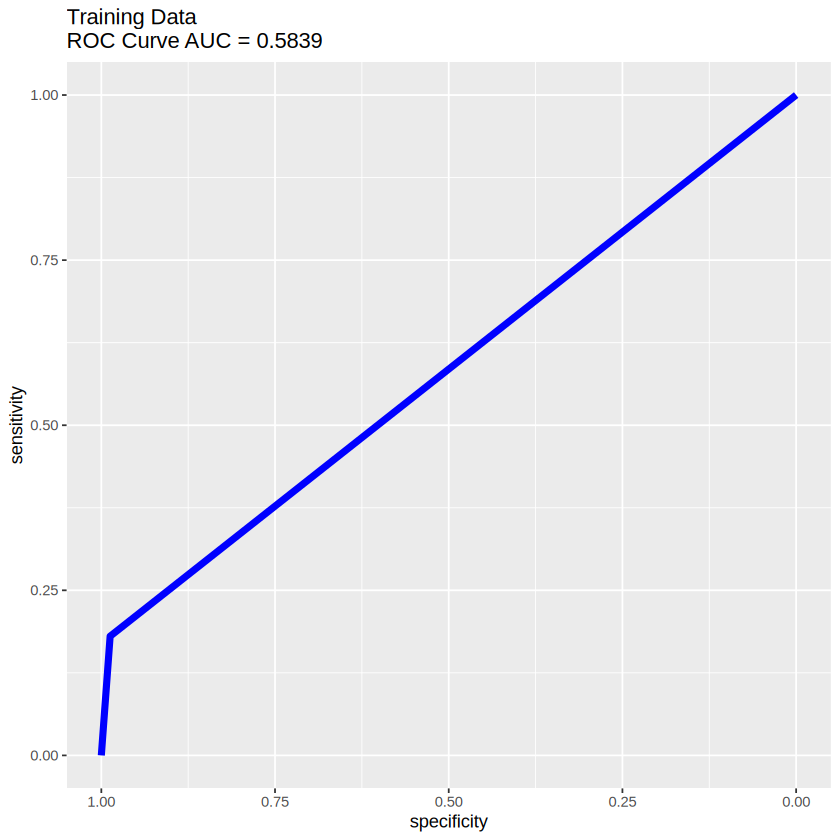

In [23]:
ggroc(objroc,colour='blue',size=2) + ggtitle(paste0('Training Data\n','ROC Curve ','AUC = ',objauc))

In [24]:
pred_test = ifelse(predict(step_select,test_df[,!(names(test_df) %in% c('y'))],type='response')>=0.5,1,0)

In [25]:
confusionMatrix(as.factor(pred_test),as.factor(ifelse(test_df$y=='no',0,1)),mode='everything')

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 9833 1111
         1  126  233
                                               
               Accuracy : 0.8906               
                 95% CI : (0.8847, 0.8963)     
    No Information Rate : 0.8811               
    P-Value [Acc > NIR] : 0.0008808            
                                               
                  Kappa : 0.2353               
                                               
 Mcnemar's Test P-Value : < 0.00000000000000022
                                               
            Sensitivity : 0.9873               
            Specificity : 0.1734               
         Pos Pred Value : 0.8985               
         Neg Pred Value : 0.6490               
              Precision : 0.8985               
                 Recall : 0.9873               
                     F1 : 0.9408               
             Prevalence : 0.8811               
         Detection R

In [26]:
objroc = roc(ifelse(test_df$y=='no',0,1),pred_test)
objauc = round(auc(ifelse(test_df$y=='no',0,1),pred_test),4)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



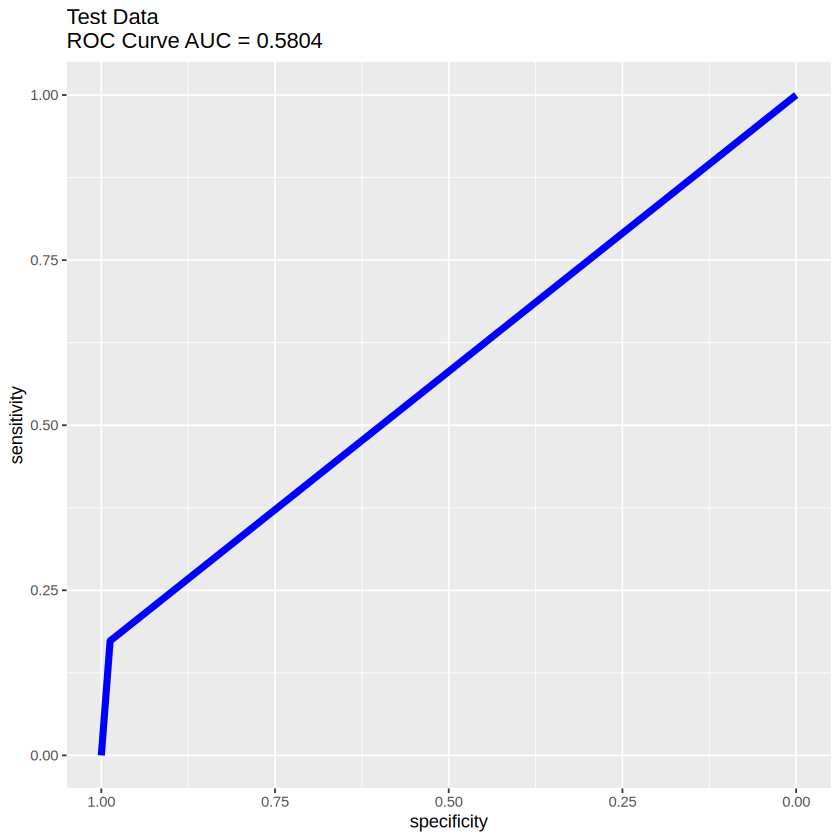

In [27]:
ggroc(objroc,colour='blue',size=2) + ggtitle(paste0('Test Data\n','ROC Curve ','AUC = ',objauc))